In [124]:
#The goal of this program is to simulate the scheduling process for a patients going through the first part
#of a bone marrow transplant patient. I will use a greedy approach.
#The algorithm schedules a patient for the first available time slot for the
#first appointment, then schedules them for the first available time slot fot the second appointment.
#then we will see what happens

import numpy as np
import random
import matplotlib.pyplot as plt 

#num_pat_list is used for the weekly d1 scheduling function, make_schedule_d1_batch
num_pat_list = []
for i in range(10): #The input in "range" gives us the number of weeks to observe
    num_pat_list.append(10) #The input in "num_pat_list.append" gives the number of patients per week.
    
sp1=10 #The number of available rooms in d1 facility
sp2=3 #The number of available rooms in d2 facility

num_pats_batch=sum(num_pat_list)

#reg_pat_arr gives us a list where the ith entry of that list gives us the day that patient i showed up for treatment.
#The days are considered in the context of a 5-day week.
reg_pat_arr = []
for i in range(60): #The number in "range" gives us the number of weekdays patients will be arriving.
    reg_pat_arr.append(i)
    reg_pat_arr.append(i) #Currently, this is set up to have patients arriving two per day.

num_pats=len(reg_pat_arr)
#setting the seed
np.random.seed(2019)
#Choosing collection numbers to be random. 
#The distribution below is almost the same as the one Yu-Li showed us.


#Build a schedule of doctor's based on doctor being available for a maximum of 1-day.
#Each doctor is assigned a weekday (at random) on which they will be available to take patients.  There is no limit to how
#many patients they can see.
np.random.seed(2019)
num_docs = 20
doc_avail_day = [np.random.randint(0,5) for d in range(num_docs)] 
#Build a master schedule for the doctor's availability for 120 days 
mast_sched_doc = np.array([[int(j%5 == doc_avail_day[d]) for j in range(120)]for d in range(num_docs)]) #Here 60 days is scheduling

#Make sure that the doc is available at most 1 day a week
doc_avail_day = [np.random.randint(0,5) for d in range(num_docs)]

#coll is used for daily patients
np.random.seed(2019)
coll = [np.random.choice([1,2,3,4,5], p =[.398,.304,.147,.088,.063]) for i in range(num_pats)]

#coll_batch is used for weekly patients
np.random.seed(2019)
coll_batch = [np.random.choice([1,2,3,4,5], p =[.398,.304,.147,.088,.063]) for i in range(num_pats_batch)]
#Choosing number of chemo days to be random according to a triangular distribution.
np.random.seed(2019)
chemo = []
for i in range(num_pats):
    chemo.append(int((random.triangular(low=1,high=6, mode=2))))

inf = []
for i in range(num_pats):
    inf.append(1)


#same as the previous few lines, but for the weekly patients

np.random.seed(2019)
chemo_batch = []
for i in range(num_pats_batch):
    chemo_batch.append(int((random.triangular(low=1,high=6, mode=2))))

inf_batch = []
for i in range(num_pats_batch):
    inf_batch.append(1)
#def make_schedule_d1(num_patients,collections, max_space1, max_days):
    #initialize schedules for d1 and d2 procedures.  These record the number of patients scheduled for each procedure on each day.
    #space1 = np.zeros(max_days)
    #space2 = np.zeros(100)
    
    #n1=len(space1)
    #n2=len(space2)
    
    #initialize a vector which will keep track of each patient's schedule for 
    #d1.
    #patients_d1 = []
    #patients_d2 = []
    #for i in range(num_patients):
     #   for j in range(n1):
      #      #for each patient, we will schedule them in the first available
            #time slot for the d1 procedure.
       #     if space1[j]< max_space1: #if there is space in the d1 facility on day j (interpret weeks as 5 days long, 1 is )
         #       for k in range(collections[i]):
        #            space1[j+k]=space1[j+k]+1 #add patient i to the schedule on day k for each day that they are collecting.
          #      patients_d1.append(j) #record the fact that patient i was scheduled for d1 on day j
           #     break
           
    #return(np.array(patients_d1))


#first_sched = make_schedule_d1(num_pats,coll, sp1,100)
    
#first_sched              
                    


In [9]:
#This block contains all of the functions used.
#make_schedule_d1 takes in num_patients (the number of patients to be scheduled), 
#collections (a list whose ith entry gives the number of collections patient i needs),
#max_space(the space available in the d1 facility), and
#max_days(the highest day we can possibly look for availability).
#The output is a list whose ith entry is the day that patient i starts the d1 procedure.
#Procedure:  Schedule patients as if they are all available to be scheduled on any weekday. The only limitation is space availability
def make_schedule_d1(num_patients,collections, max_space, max_days):
    #initialize schedules for d1 and d2 procedures.  These record the number of patients scheduled for each procedure on each day.
    space = np.zeros(max_days)    
    n=len(space)
    
    #initialize a vector which will keep track of each patient's schedule for 
    #d1.
    patients_d1 = []
    #patients_d2 = []
    for i in range(num_patients):
        for j in range(n1):
            #for each patient, we will schedule them in the first available
            #time slot for the d1 procedure.
            if space1[j]< max_space1: #if there is space in the d1 facility on day j (interpret weeks as 5 days long, 1 is )
                for k in range(collections[i]):
                    space1[j+k]=space1[j+k]+1 #add patient i to the schedule on day k for each day that they are collecting.
                patients_d1.append(j) #record the fact that patient i was scheduled for d1 on day j
                break
           
    return(np.array(patients_d1))

#make_schedule_d1_daily takes in patient_arrivals(a list whose ith entry is the day patient i arrives), 
#collections (a list whose ith entry gives the number of collections patient i needs),
#max_space(the space available in the d1 facility), and
#max_days(the highest day we can possibly look for availability).
#The output is a list whose ith entry is the day that patient i starts the d1 procedure.
#Procedure: A patient is scheduled no earlier than the day after they arrive.
def make_schedule_d1_daily(patient_arrivals, collections, max_space, max_days):
    space = np.zeros(max_days)
    patients_d1 = []
    for i,pat_arr_time in enumerate(patient_arrivals):
        for j in range(pat_arr_time+1, max_days): #potential start day.  Cannot schedule a patient for the day they arrive
            check = space[j] #This is used to determine if the patient was successfully scheduled on day j.
            for m in range(collections[i]):
                #for each patient, we will schedule them in the first available
                #time slot for the d1 procedure.  We take into account the week that they arrive, so they cannot start on
                #a day before they arrive.  
                #if the patient being scheduled would ever overflow capacity on any collection day, then skip to 
                #the next day
                if space[j+m]>=max_space:
                    break
                elif (space[j+m]< max_space) and (m==collections[i]-1): #if there is space in the d1 facility on day j (interpret weeks as 5 days long, 0 is Monday)
                    for k in range(collections[i]):
                        space[j+k]+=1 #add patient 5*i+k to the schedule on each day that they are collecting.
                    patients_d1.append(j) #record the fact that patient i was scheduled for d1 on day j
                    break
            if space[j]!=check: #If they were scheduled, then go to the next patient
                break
                
    return(np.array(patients_d1))
            
#Makes a d1 schedule which places a patient in the first available day slot.
#Output is a list.  ith position tells you the day patient i is scheduled for the d1 procedure.  
#Day 0 is a Monday, and we ignore weekends when scheduling.
#This will take in a list with the number of patients coming in each week.
def make_schedule_d1_batch(num_patients_list, collections, max_space1,max_days):
    space1 = np.zeros(max_days)
    #space2 = np.zeros(100)
    
    n1=len(space1) #number of days
    #n2=len(space2)
    
    #initialize a vector which will keep track of each patient's date for the start of the d1 procedure
    patients_d1 = []

    for i,num_patients in enumerate(num_patients_list):
        for k in range(num_patients):
            for j in range(5*i,n1): #potential start days for the patient.
                check = space1[j] #This is used to determine if the patient was successfully scheduled on day j.
                for m in range(collections[num_patients*i+k]):
                    #for each patient, we will schedule them in the first available
                    #time slot for the d1 procedure.  We take into account the week that they arrive, so they cannot start on
                    #a day before they arrive.  
                    #if the patient being scheduled would ever overflow capacity on any collection day, then skip to 
                    #the next day
                    if space1[j+m]>=max_space1:
                        break
                    elif (space1[j+m]< max_space1) and (m==collections[num_patients*i+k]-1): #if there is space in the d1 facility on day j (interpret weeks as 5 days long, 0 is Monday)
                        for k in range(collections[num_patients*i+k]):
                            space1[j+k]+=1 #add patient 5*i+k to the schedule on each day that they are collecting.
                        patients_d1.append(j) #record the fact that patient i was scheduled for d1 on day j
                        break
                if space1[j]!=check: #If they were scheduled, then go to the next patient
                    break
                
           
    return(np.array(patients_d1))

#Let's make a function that will generate a patient list given a daily expected arrival rate.  The distance 
#between arrivals will draw from an exponential distribution.  We will give the number of patients we want to schedule
#and the mean arrival rate (which is 1/lambda).
#Use this if you would like to generate a list of patients and the day that they arrive in a random manner.
def pat_arr_times(num_pats, arr_rate):
    pat_list = [np.random.exponential(scale=arr_rate)] #this is the first patient arriving.
    for i in range(num_pats-1):
        pat_list.append(pat_list[i]+np.random.exponential(scale=arr_rate))
    for j in range(num_pats):
        pat_list[j]=int(round(pat_list[j]))
    return pat_list
   


#Let's create a function that will create a d2 schedule given a d1 schedule, the number of collections they need,
#and the max amount of space available in the d2 facility.
#d1_schedule is a list of length n, same size list as collections.  Output is a list of numbers whose ith entry is the
#day patient i starts d2 procedure.  The max space is the
#number of spaces which the facility has, and a patient goes through the facility in an hour.  
#The only limitation here is space, so effectively there are 8*max_space2 spaces available

def make_schedule_d2(d1_schedule, collections, max_space2,max_days):
    space2 = np.zeros(max_days) #the length of this list is the max number of days we can schedule for
    patients2=[] #Initiate a patient list
    for j, day in enumerate(d1_schedule):
        if space2[day+collections[j]]<8*max_space2:
            space2[day+collections[j]]=space2[day+collections[j]]+1
            patients2.append(day+collections[j])
    return(np.array(patients2))

#Let's create a schedule now from the d1 schedule, the number of collections, and the doctor availability.  
#Patients will be assigned a number from 0 to n-1 where n is the number of doctors, and these numbers will represent the 
#doctors.  We will then check whether the first available day for d2 is a day when their doctor is available.  If not
#we will look to the next day, etc.


def make_schedule_d2_doctors(d1_schedule, collections,doc_sched, max_space2, max_days):
    space2 = np.zeros(max_days) #the length of this list is the max number of days 
    patients2=[] #Initiate a patient list
    #make a list assigning a patient to one of the doctors
    patient_doc = []
    for i in range(len(d1_schedule)):
        patient_doc.append(np.random.randint(0,len(doc_sched))) #randomly assigns each patient a doctor
    for j, day in enumerate(d1_schedule): #j is keeping track of patients
        for k in range(day,max_days-collections[j]): #k is keeping track of the day
            #print(space2[k+collections[j]], doc_sched[patient_doc[j]][k])
            if space2[k+collections[j]]<8*max_space2 and doc_sched[patient_doc[j]][k]==1: #if there is space and the doc is available
                space2[k+collections[j]]+=1
                patients2.append(k+collections[j])
                break
            
    return(np.array(patients2))

#This will be slightly different from the function above.  for doc_sched: this should be a list of integers from 0 to 4
#representing weekdays.  A patient is randomly assigned to a doctor
def make_schedule_d2_doctors_2(d1_schedule, collections,doc_sched, max_space2, max_days):
    space2 = np.zeros(max_days) #the length of this list is the max number of days 
    patients2=[] #Initiate a patient list
    #make a list assigning a patient to one of the doctors
    patient_doc = []
    for i in range(len(d1_schedule)):
        patient_doc.append(np.random.randint(0,len(doc_sched))) #randomly assigns each patient a doctor
    for j, day in enumerate(d1_schedule): #j is keeping track of patients
        for k in range(day,max_days-collections[j]): #k is keeping track of the day
            #print(space2[k+collections[j]], doc_sched[patient_doc[j]][k])
            if space2[k+collections[j]]<8*max_space2 and doc_sched[patient_doc[j]]==(k+collections[j])%5: #if there is space and the doc is available
                space2[k+collections[j]]+=1
                patients2.append(k+collections[j])
                break
            
    return(np.array(patients2))

#Given a d2 schedule, the number of days each patient needs for chemo, and , make a function that will tell you how many patients are in the hospital (different from the d1
#and d2 facility) on any given day.  
#Some variables to consider: number of days for chemo for each patient, number of days for infusion for each patient.

def make_schedule_hospital(chemo_sched, infusion_sched):
    hosp_sched = []
    for i in range(len(chemo_sched)):
        hosp_sched.append(chemo_sched[i]+infusion_sched[i])
    return(hosp_sched) #The ith position will give the number of people in the hospital on day i.

#the following function makes a "chemo schedule".  This is a list where the indices now represent the day, and the 
#values are the number of patients in chemo on that day.  It will take in a 5-day week d2 schedule and give us a 7-day
#weeks are 7 days because they can schedule on weekends.
#We cannot make the last day of chemo on a Friday.
#If that happens, bump up the schedule for chemo by 1.
def make_schedule_chemo(d2_schedule, chemo_list, max_days):
    d2_schedule_7day = five_to_seven(d2_schedule)
    chemo_space = np.zeros(max_days)
    for i,day in enumerate(d2_schedule_7day):
        if (day + chemo_list[i])%7==4: #If it would end on a Friday, bump days up by 1.
            for j in range(chemo_list[i]):
                chemo_space[day+2+j]+=1
        else:
            for j in range(chemo_list[i]):
                chemo_space[day+1+j]+=1
    for i in range(len(chemo_space)):
        chemo_space[i]=int(chemo_space[i])
    return(chemo_space) #The ith position will give the number of people in chemo on day i.
   
#The following makes an "infusion schedule", which is analogous to the chemo schedule above.
def make_schedule_infusion(d2_schedule, chemo_list, infusion_list, max_days):
    d2_schedule_7day = five_to_seven(d2_schedule)
    chemo_space = np.zeros(max_days)
    infusion_space = np.zeros(max_days)
    for i,day in enumerate(d2_schedule_7day):
        if (day+chemo[i])%5==3:
            for k in range(infusion_list[i]):
                infusion_space[day+chemo_list[i]+k] += 1
        else:
            for k in range(infusion_list[i]):
                infusion_space[day+chemo_list[i]+k+1] += 1
    for i in range(len(infusion_space)):
        infusion_space[i]=int(infusion_space[i])
    return(infusion_space) #The ith position will give the number of people getting an infusion on day i.

#hosp_sched = make_schedule_hospital(second_sched,chemo,inf, total_days)           

#Let's make a function that will take in a d1 schedule and a d2 schedule, and the collections each patient needs
# and calculate the wait times for each patient.  
#Recall that the days are given by 5-day weeks so that 0 is a Monday and 4 is a Friday, and 5 wraps
#back around to Monday.  We want to count weekends in the wait time, so that if a patient ends d1 on a
#Friday and begins d2 on a Monday, then the wait time for that patient is 2.

def wait_time(d1_schedule, d2_schedule, collections):
    q1 = []
    n = len(d1_schedule)
    for i in range(n):
        for j in range(collections[i]):
            if (d1_schedule[i]+j)%5==4: #if any of the collection days is a Friday
                q1.append(d2_schedule[i]-(d1_schedule[i]+collections[i])+2) #add 2 to the wait time.
                break
            #if none of the collection days is a friday, then the wait time is the difference between the
            #d1 end day plus 1 and the d2 start day.  A day of waiting is a day where nothing else happens
            elif j==collections[i]-1:
                q1.append(d2_schedule[i]-(d1_schedule[i]+collections[i]))
    return q1
        
#Let's plot the d1 and d2 patients going through the system
#First we need a function that will convert the d1 and d2 schedule (giving the day the patient) to the number of patients
#in the system who are undergoing the d1 and d2 processes on any given day.

def num_patients_per_day_d2(schedule, max_days):
    num_pats_day = np.zeros(max_days)
    for i in schedule:
        num_pats_day[i]+=1
    return(num_pats_day)

def num_patients_per_day_d1(schedule,collections, max_days):
    num_pats_day = np.zeros(max_days)
    for i,day in enumerate(schedule):
        for j in range(collections[i]):
            num_pats_day[day+j]+=1
    return(num_pats_day)

#Task: create a function that will take a patient's schedule and convert it from a 5-day week to a 7-day week.
def five_to_seven(schedule):
    #to any number, add 2*(number of times 5 goes into it)
    new_sched=[]
    for day in schedule:
        new_sched.append(day+2*(day/5))
    return new_sched
    
#Visualizations

#Compare wait times: graph the three methods on the same plot to compare
#Compare nurse staff requirements: For the simulation, just use a step plot for the d1 patient volume. 
#For d2, divide the patient volume by 8 and round up to get a nurse count.
#Compare daily patient volume directly.


#Another method to try to improve baseline?
#Another idea is to make the d1 process smoother by taking into account the current week's schedule and picking a day
#to schedule the new patient that will make the d1 patient volume fluctuation flat.

In [10]:
#test run of daily patient arrivals and converting from a 5-day week to a 7-day week.
np.random.seed(2019)
pat_list_daily = pat_arr_times(num_pats,.5)
#print pat_list_daily
#daily_sched_d1 = make_schedule_d1_daily(pat_list_daily, coll, sp1, 150)

print(daily_sched_d1)
daily_sched_d1_7day=five_to_seven(daily_sched_d1)
print(daily_sched_d1_7day)

[ 1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10 11 11 12 12
 13 13 14 14 15 15 16 16 17 17 18 18 19 19 20 20 21 21 22 22 23 23 24 24
 25 25 26 26 27 27 28 28 29 29 30 30 31 31 32 32 33 33 34 34 35 35 36 36
 37 37 38 38 39 39 40 40 41 41 42 42 43 43 44 44 45 45 46 46 47 47 48 48
 49 49 50 50 51 51 52 52 53 53 54 54 55 55 56 56 57 57 58 58 59 59 60 60]
[1, 1, 2, 2, 3, 3, 4, 4, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 49, 49, 50, 50, 51, 51, 52, 52, 53, 53, 56, 56, 57, 57, 58, 58, 59, 59, 60, 60, 63, 63, 64, 64, 65, 65, 66, 66, 67, 67, 70, 70, 71, 71, 72, 72, 73, 73, 74, 74, 77, 77, 78, 78, 79, 79, 80, 80, 81, 81, 84, 84]


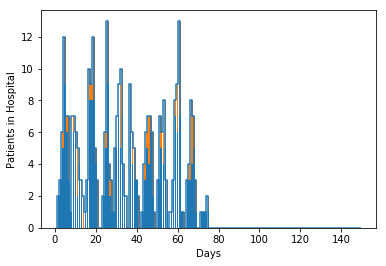

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]


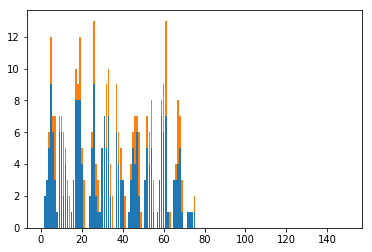

In [121]:
#Let's run the whole process for the batch (weekly) schedule

batch_sched_d1 = make_schedule_d1_batch(num_pat_list, coll_batch, sp1, 150)
batch_sched_d2 = make_schedule_d2(batch_sched_d1,coll_batch, sp2, 150)
batch_chemo_sched = make_schedule_chemo(batch_sched_d2,chemo_batch,150) 
batch_infusion_sched = make_schedule_infusion(batch_sched_d2,chemo_batch,inf_batch,150)
batch_hosp_sched = make_schedule_hospital(batch_chemo_sched,batch_infusion_sched)  


#Now let's plot the patient influx (chemo+infusion patients)
NumDays = len(batch_hosp_sched)
Nd=list(range(1,NumDays))
plt.step(Nd, batch_hosp_sched[1:150])
chemo_plt = plt.bar(Nd,batch_chemo_sched[1:150])
inf_plt = plt.bar(Nd,batch_infusion_sched[1:150], bottom=batch_chemo_sched[1:150])
plt.xlabel("Days")
plt.ylabel("Patients in Hospital")

plt.show()
#mean number of patients in the hospital
#sum(batch_hosp_sched[1:55])/(len(batch_hosp_sched[1:55]))

print(Nd)
#len(batch_chemo_sched[1:150])
#Breakdown the chemo and infusion numbers
chemo_plt = plt.bar(Nd,batch_chemo_sched[1:150])
inf_plt = plt.bar(Nd,batch_infusion_sched[1:150], bottom=batch_chemo_sched[1:150])

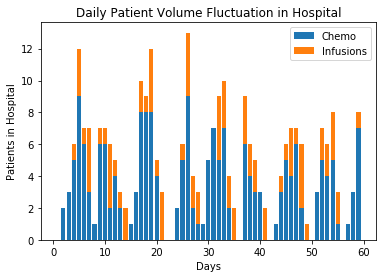

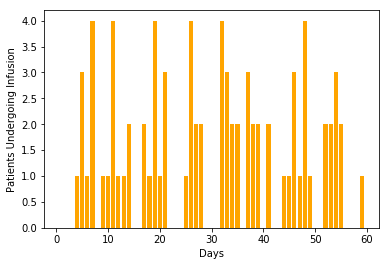

Text(0,0.5,'Patients Undergoing Chemotherapy')

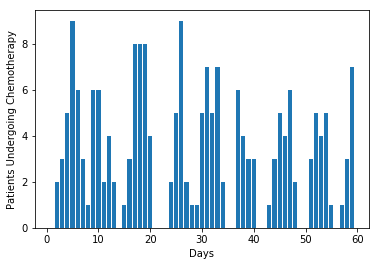

In [122]:
#Now let's plot the patient influx(chemo+infusion).  We will limit the days to the first 60.
NumDays = 60
Nd=list(range(1,NumDays))
#plt.step(Nd, batch_hosp_sched[1:60],color="k",linewidth=1.5)
chemo_plt = plt.bar(Nd,batch_chemo_sched[1:60], label= "Chemo")
inf_plt = plt.bar(Nd,batch_infusion_sched[1:60], bottom=batch_chemo_sched[1:60], label="Infusions")
plt.xlabel("Days")
plt.ylabel("Patients in Hospital")
plt.title("Daily Patient Volume Fluctuation in Hospital")
plt.legend(loc="best")
plt.show()

inf_plt = plt.bar(Nd,batch_infusion_sched[1:60],color="orange")
plt.xlabel("Days")
plt.ylabel("Patients Undergoing Infusion")
plt.show()

chemo_plt = plt.bar(Nd,batch_chemo_sched[1:60])
plt.xlabel("Days")
plt.ylabel("Patients Undergoing Chemotherapy")

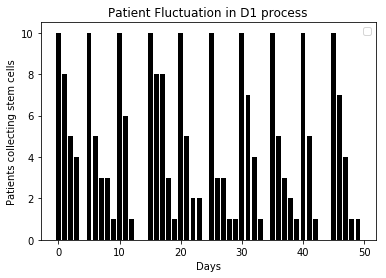

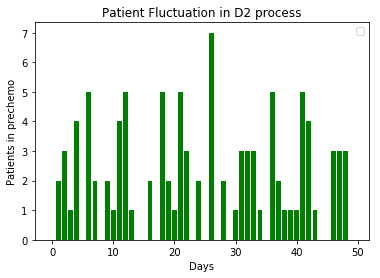

In [123]:


num_pats_d1 = num_patients_per_day_d1(batch_sched_d1,coll, 150)
num_pats_d2 = num_patients_per_day_d2(batch_sched_d2, 150)

NumDays = 50
Nd=list(range(0,NumDays))
#plt.step(Nd, batch_hosp_sched[1:70],color="k",linewidth=1.5)
d1_plt = plt.bar(Nd,num_pats_d1[0:50], color = "k")
plt.xlabel("Days")
plt.ylabel("Patients collecting stem cells")
plt.title("Patient Fluctuation in D1 process")
plt.legend(loc="best")
plt.show()

d2_plt = plt.bar(Nd,num_pats_d2[0:50], color="green")
plt.xlabel("Days")
plt.ylabel("Patients in prechemo")
plt.title("Patient Fluctuation in D2 process")
plt.legend(loc="best")
plt.show()



In [67]:
#Making some plots to visualize the daily schedules 
import collections
from collections import Counter

daily_sched_d1 = make_schedule_d1_daily(reg_pat_arr, coll, sp1, 150)
np.random.seed(2019)
daily_sched_d2 = make_schedule_d2_doctors(daily_sched_d1,coll,mast_sched_doc, sp2, 150)

daily_chemo_sched = make_schedule_chemo(daily_sched_d2,chemo,150) 
daily_infusion_sched = make_schedule_infusion(daily_sched_d2,chemo,inf,150)
daily_hosp_sched = make_schedule_hospital(daily_chemo_sched,daily_infusion_sched) 
for i in range(len(daily_hosp_sched)):
    daily_hosp_sched[i]=int(daily_hosp_sched[i])
#daily_sched_d1_7day = five_to_seven(daily_sched_d1)
#daily_sched_d2_7day = five_to_seven(daily_sched_d2)

#First, we look at daily fluctuations in d1 and d2 processes
num_pats_d1 = num_patients_per_day_d1(daily_sched_d1,coll, 150)

num_pats_d2 = num_patients_per_day_d2(daily_sched_d2, 150)


#Adding zeros to weekends for the d1 and d2 processes
lst = range(len(num_pats_d1))
lst.reverse()
for i in lst:
    if (i%5)==0 and i!=0:
        num_pats_d1=np.insert(num_pats_d1,i,[0,0])
for i in lst:
    if (i%5)==0 and i!=0:
        num_pats_d2=np.insert(num_pats_d2,i,[0,0])


#Some summary statistics for the plots
std_d1_greedy = np.std(num_patients_per_day_d1(daily_sched_d1,coll, 150)[1:62]) 
avg_d1_greedy = np.mean(num_patients_per_day_d1(daily_sched_d1,coll, 150)[1:62])
std_d2_greedy = np.std(num_patients_per_day_d2(daily_sched_d2, 150)[2:64])
avg_d2_greedy = np.mean(num_patients_per_day_d2(daily_sched_d2, 150)[2:64])
print std_d1_greedy
print avg_d1_greedy
print std_d2_greedy
print avg_d2_greedy

wait_greedy = wait_time(daily_sched_d1,daily_sched_d2,coll)
avg_wait_greedy = np.mean(wait_greedy) #avg wait time for greedy
print avg_wait_greedy

std_wait_greedy = np.std(wait_greedy) #std of wait time for greedy
print std_wait_greedy
avg_chemo_greedy = np.mean(daily_chemo_sched) 


1.2258963341534372
4.147540983606557
1.2663088017026145
1.903225806451613
2.825
1.6815791189632838


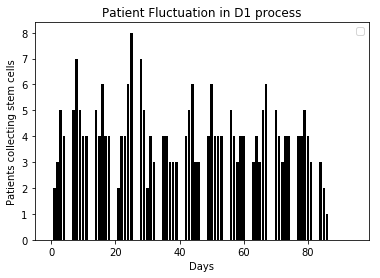

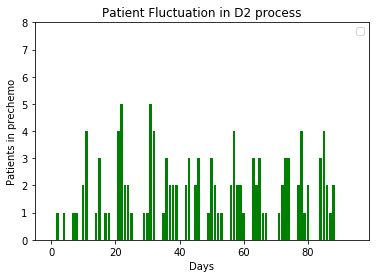

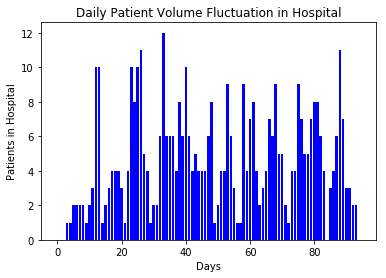

<Figure size 576x432 with 0 Axes>

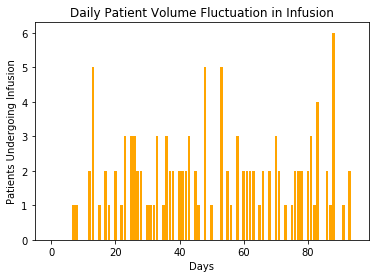

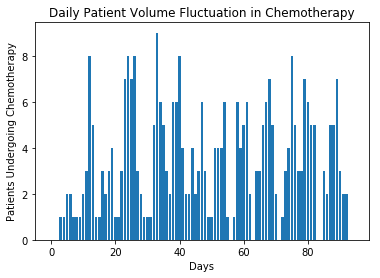

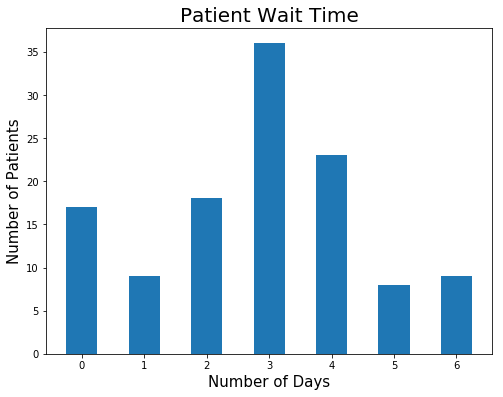

Counter({0: 17, 1: 9, 2: 18, 3: 36, 4: 23, 5: 8, 6: 9})

In [111]:
#Make plots of the hospital fluctuations, the chemo fluctuations, and the infusion fluctuations.
#chemo_plt = plt.bar(Nd,daily_chemo_sched[0:NumDays], label= "Chemo")
#inf_plt = plt.bar(Nd,daily_infusion_sched[0:NumDays], bottom=daily_chemo_sched[0:NumDays], label="Infusions")
NumDays = 95
Nd=list(range(0,NumDays))
#plt.step(Nd, batch_hosp_sched[1:70],color="k",linewidth=1.5)
d1_plt = plt.bar(Nd,num_pats_d1[0:NumDays], color = "k")
plt.xlabel("Days")
plt.ylabel("Patients collecting stem cells")
plt.title("Patient Fluctuation in D1 process")
plt.legend(loc="best")
#plt.text(50,7.5,s="Standard deviation = 1.23")
#plt.text(71.4,7,s="Mean = 4.15")
plt.show()

d2_plt = plt.bar(Nd,num_pats_d2[0:NumDays], color="green")
plt.xlabel("Days")
plt.ylabel("Patients in prechemo")
plt.ylim(bottom=0,top= 8)
plt.title("Patient Fluctuation in D2 process")
plt.legend(loc="best")
#plt.text(50,4.8,s="Standard deviation = 1.27")
#plt.text(71.4,4.5,s="Mean = 1.90")
plt.show()

hosp_plt = plt.bar(Nd,daily_hosp_sched[0:NumDays], color ="b")
plt.xlabel("Days")
plt.ylabel("Patients in Hospital")
plt.title("Daily Patient Volume Fluctuation in Hospital")
#plt.legend(loc="best")
plt.figure(figsize=(8,6))
plt.show()

inf_plt = plt.bar(Nd,daily_infusion_sched[0:NumDays],color="orange")
plt.xlabel("Days")
plt.ylabel("Patients Undergoing Infusion")
plt.title("Daily Patient Volume Fluctuation in Infusion")
plt.show()

chemo_plt = plt.bar(Nd,daily_chemo_sched[0:NumDays])
plt.xlabel("Days")
plt.ylabel("Patients Undergoing Chemotherapy")
plt.title("Daily Patient Volume Fluctuation in Chemotherapy")
plt.show()

#The following are plots of wait times (code from Dhir)
#print(daily_chemo_sched)

data = collections.Counter(Counter(wait_time(daily_sched_d1,daily_sched_d2,coll)))
plt.figure(figsize=(8,6))
plt.bar(data.keys(), data.values(), width=0.5)
plt.xlabel("Number of Days", fontsize=15)
plt.ylabel("Number of Patients", fontsize=15)
plt.title("Patient Wait Time", fontsize=20)
#plt.text(5.11,30,s="Mean = 2.83")
#plt.text(4.02,28,s="Standard deviation = 1.68")
plt.savefig("wait_time_bar_plot.png", transparent=True, bbox_inches='tight')
plt.show()
data

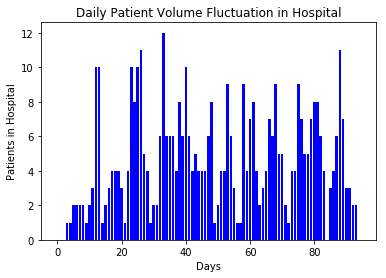

<Figure size 576x432 with 0 Axes>

<BarContainer object of 95 artists>

In [109]:
#This block creates a plot of the patient volume each day in the hospital.
hosp_plt = plt.bar(Nd,daily_hosp_sched[0:NumDays], color ="b")
plt.xlabel("Days")
plt.ylabel("Patients in Hospital")
plt.title("Daily Patient Volume Fluctuation in Hospital")
#plt.text(50,12, s="Standard deviation = 2.86")
#plt.text(71.3,11.4, s="Mean = 4.78")
plt.figure(figsize=(8,6))
plt.show()
hosp_plt

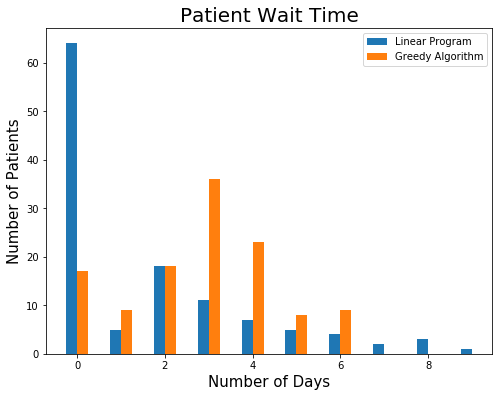

In [106]:
#This code block is used to compare the wait times of a run from the linear program (given by wait_time_lp) and the 
#greedy algorithm on the same plot.
wait_time_lp = [2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 2.0, 2.0, 3.0, 0.0, -0.0, 0.0, 0.0, 3.0, 3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0,0.0, 4.0, 0.0, 2.0, 2.0, 8.0, 0.0, 0.0, 0.0, 5.0, 3.0, 2.0, 2.0, 0.0, 0.0, 2.0, 5.0, 0.0, 4.0, 7.0, 5.0, 0.0, 0.0, 3.0, 2.0, 4.0, 0.0, 8.0, 4.0, 5.0, 6.0, 0.0, 1.0, 0.0, 5.0, 3.0, 2.0, 4.0, 0.0, 8.0, 6.0, 0.0, 2.0, 0.0, 0.0, 2.0, 2.0, 6.0, 0.0, 3.0, 3.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 4.0, 7.0, 0.0, 9.0, 2.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 3.0, 2.0, 2.0, 2.0, 0.0,0.0]
data2 = collections.Counter(Counter(wait_time_lp))
plt.figure(figsize=(8,6))
plt.bar(np.array(data2.keys())-.125, data2.values(), width=0.25, label = "Linear Program")
plt.bar(np.array(data.keys())+.125, data.values(), width=0.25, label = "Greedy Algorithm")
plt.xlabel("Number of Days", fontsize=15)
plt.ylabel("Number of Patients", fontsize=15)
plt.title("Patient Wait Time", fontsize=20)
plt.legend(loc="best")
plt.savefig("wait_time_bar_plot.png", transparent=True, bbox_inches='tight')
plt.show()